### Imports and Data Reading

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("./datasets/train.csv")
test = pd.read_csv("./datasets/test.csv")

In [3]:
# familiarize self with data
# there are 82 columns, which jupyter will cut off so max columns and rows are updated so we can see all output

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
train.head().T

,0,1,2,3,4
Id,109,544,153,318,255
PID,533352170,531379050,535304180,916386060,906425045
MS SubClass,60,60,20,60,50
MS Zoning,RL,RL,RL,RL,RL
Lot Frontage,NaN,43,68,73,82
Lot Area,13517,11492,7922,9802,14235
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,IR1,Reg,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl


## Data Cleaning 

This will consist of filling null values depending on what category they are in and what having a null in this category means for that property. Data types will also be updated so they are accurate to the cleaned values. 

In [4]:
# assess nullity 

train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [5]:
# cleaning null values
# each block of code is updating the null values of one column
# in some cases this step was combined with udpating the data type of the column 
# all code will be done for both train and test datasets

# assuming no entry for alley access to property translates to no alley access 
train["Alley"].fillna("NA", inplace = True)
test["Alley"].fillna("NA", inplace = True)


# assuming null entries for this field indicates lot frontage is equal to zero 
train["Lot Frontage"].fillna(0.0, inplace = True)
train["Lot Frontage"] = train["Lot Frontage"].astype('int64')
test["Lot Frontage"].fillna(0.0, inplace = True)
test["Lot Frontage"] = test["Lot Frontage"].astype('int64')


# all values with null masonry veneer type also had no entry for area of masonry veneer 
# it is assumed that with no entry this indicates there is no masonry veneer on the home 
train["Mas Vnr Type"].fillna("None", inplace = True)

train["Mas Vnr Area"].fillna(0.0, inplace = True)
train["Mas Vnr Area"] = train["Mas Vnr Area"].astype('int64')

test["Mas Vnr Type"].fillna("None", inplace = True)

test["Mas Vnr Area"].fillna(0.0, inplace = True)
test["Mas Vnr Area"] = test["Mas Vnr Area"].astype('int64')


# all entries with a null basement quality field also had null values for basement condition and exposure
# most of these entries also had zero for fields measuring basement square footage
# both entries that had null values for basement full and half bathrooms were also in this group
# it is assumed that null values in basement-oriented columns indicate there is no basement 
train["Bsmt Qual"].fillna("NA", inplace = True)
test["Bsmt Qual"].fillna("NA", inplace = True)

train["Bsmt Cond"].fillna("NA", inplace = True)
test["Bsmt Cond"].fillna("NA", inplace = True)

train["Bsmt Exposure"].fillna("NA", inplace = True)
test["Bsmt Exposure"].fillna("NA", inplace = True)

train["BsmtFin Type 1"].fillna("NA", inplace = True)
test["BsmtFin Type 1"].fillna("NA", inplace = True)

train["BsmtFin SF 1"].fillna(0.0, inplace = True)
train["BsmtFin SF 1"] = train["BsmtFin SF 1"].astype('int64')
test["BsmtFin SF 1"].fillna(0.0, inplace = True)
test["BsmtFin SF 1"] = test["BsmtFin SF 1"].astype('int64')

train["BsmtFin Type 2"].fillna("NA", inplace = True)
test["BsmtFin Type 2"].fillna("NA", inplace = True)

train["BsmtFin SF 2"].fillna(0.0, inplace = True)
train["BsmtFin SF 2"] = train["BsmtFin SF 2"].astype('int64')
test["BsmtFin SF 2"].fillna(0.0, inplace = True)
test["BsmtFin SF 2"] = test["BsmtFin SF 2"].astype('int64')

train["Bsmt Unf SF"].fillna(0.0, inplace = True)
train["Bsmt Unf SF"] = train["Bsmt Unf SF"].astype('int64')
test["Bsmt Unf SF"].fillna(0.0, inplace = True)
test["Bsmt Unf SF"] = test["Bsmt Unf SF"].astype('int64')

train["Total Bsmt SF"].fillna(0.0, inplace = True)
train["Total Bsmt SF"] = train["Total Bsmt SF"].astype('int64')
test["Total Bsmt SF"].fillna(0.0, inplace = True)
test["Total Bsmt SF"] = test["Total Bsmt SF"].astype('int64')

train["Bsmt Full Bath"].fillna(0, inplace = True)
train["Bsmt Full Bath"] = train["Bsmt Full Bath"].astype('int64')
test["Bsmt Full Bath"].fillna(0, inplace = True)
test["Bsmt Full Bath"] = test["Bsmt Full Bath"].astype('int64')

train["Bsmt Half Bath"].fillna(0, inplace = True)
train["Bsmt Half Bath"] = train["Bsmt Half Bath"].astype('int64')
test["Bsmt Half Bath"].fillna(0, inplace = True)
test["Bsmt Half Bath"] = test["Bsmt Half Bath"].astype('int64')

# observed entries with null values for fireplace quality also had zero for fireplaces present in home
# it is assumed that a null entry for this field indicates there are no fireplaces 
train["Fireplace Qu"].fillna("NA", inplace = True)
test["Fireplace Qu"].fillna("NA", inplace = True)

# observed entries with null values for garage type, year built, finish, quality, and condition also displayed zero 
##   for columns measuring garage car capacity and square footage
# it is assumed null entries for these fields indicate there is no garage
# Garage Year Built is filled with year sold so calculations of garage age will not be skewed
##   this is as opposed to entering 0000 as the year built 
train["Garage Type"].fillna("NA", inplace = True)
test["Garage Type"].fillna("NA", inplace = True)

train["Garage Yr Blt"].fillna(train["Yr Sold"], inplace = True)
train["Garage Yr Blt"] = train["Garage Yr Blt"].astype('int64')
test["Garage Yr Blt"].fillna(train["Yr Sold"], inplace = True)
test["Garage Yr Blt"] = test["Garage Yr Blt"].astype('int64')

train["Garage Finish"].fillna("NA", inplace = True)
test["Garage Finish"].fillna("NA", inplace = True)

train["Garage Cars"].fillna(0, inplace = True)
test["Garage Cars"].fillna(0, inplace = True)

train["Garage Area"].fillna(0, inplace = True)
test["Garage Area"].fillna(0, inplace = True)

train["Garage Qual"].fillna("NA", inplace = True)
test["Garage Qual"].fillna("NA", inplace = True)

train["Garage Cond"].fillna("NA", inplace = True)
test["Garage Cond"].fillna("NA", inplace = True)

# observed entries with null values for pool quality also had zero for pool area
# assuming null entries for these fields indicate no pool 
train["Pool QC"].fillna("NA", inplace = True)
test["Pool QC"].fillna("NA", inplace = True)

# assuming null entries for this field indicate there is no fence
# not all homes will have fences
train["Fence"].fillna("NA", inplace = True)
test["Fence"].fillna("NA", inplace = True)

# null entries for misc feature also had zero listed for misc feature value
# assuming null entries for this field indicate there are no miscellaneous features
train["Misc Feature"].fillna("NA", inplace = True)
test["Misc Feature"].fillna("NA", inplace = True)

In [6]:
# combining features of home
# combining bathroom and half-bathroom columns for both basement and above ground 

train["Bsmt Bath"] = train["Bsmt Full Bath"] + train["Bsmt Half Bath"] * 0.5
test["Bsmt Bath"] = test["Bsmt Full Bath"] + test["Bsmt Half Bath"] * 0.5

train["Bath AbvGr"] = train["Full Bath"] + train["Half Bath"] * 0.5 
test["Bath AbvGr"] = test["Full Bath"] + test["Half Bath"] * 0.5 

# combining above ground square footage and basement square footage for total square footage
train["Total SF"] = train["Total Bsmt SF"] + train["Gr Liv Area"]
test["Total SF"] = test["Total Bsmt SF"] + test["Gr Liv Area"]

In [7]:
train.drop(columns = ["Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", "Half Bath"], inplace = True)
test.drop(columns = ["Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", "Half Bath"], inplace = True)

In [8]:
# combine overall quality and condition to average of the two 
# looking at metrics for both categories implies similar distribution and ranking of each 

train["Overall Qu Co Avg"] = (train["Overall Cond"] + train["Overall Qual"])/2
train.drop(columns = ["Overall Cond", "Overall Qual"], inplace = True)

test["Overall Qu Co Avg"] = (test["Overall Cond"] + test["Overall Qual"])/2
test.drop(columns = ["Overall Cond", "Overall Qual"], inplace = True)

In [9]:
# add column for age of house when sold and years since remodel

train["Age Sold"] = train["Yr Sold"] - train["Year Built"]
train["Remodel Age"] = train["Yr Sold"] - train["Year Remod/Add"]

test["Age Sold"] = test["Yr Sold"] - test["Year Built"]
test["Remodel Age"] = test["Yr Sold"] - test["Year Remod/Add"]

# account for negative values 

train["Age Sold"] = np.where((train["Age Sold"] <= 0), 0, train["Age Sold"])
train["Remodel Age"] = np.where((train["Remodel Age"] <= 0), 0, train["Remodel Age"])

test["Age Sold"] = np.where((test["Age Sold"] <= 0), 0, test["Age Sold"])
test["Remodel Age"] = np.where((test["Remodel Age"] <= 0), 0, test["Remodel Age"])

In [10]:
# reassign TotRms AbvGrd to include bathrooms 
train["TotRms AbvGrd"] = train["TotRms AbvGrd"] + train["Bath AbvGr"]
test["TotRms AbvGrd"] = test["TotRms AbvGrd"] + test["Bath AbvGr"]

In [11]:
# add column for building having a second story
# used the 2nd floor square footage as a base; if square footage was zero then it is assumed there is no second story 

sec_story = pd.get_dummies(train["2nd Flr SF"])
sec_story.columns = sec_story.columns.astype("str")
rem = list(sec_story.columns)
rem.remove("0")
sec_story.drop(columns = rem, inplace = True)
sec_story.rename(columns = {"0": "Second Story"}, inplace = True)

train = train.join(sec_story)
train.head()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Bsmt Bath,Bath AbvGr,Total SF,Overall Qu Co Avg,Age Sold,Remodel Age,Second Story
0,109,533352170,60,RL,0,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,3,1,Gd,8.5,Typ,0,NA,Attchd,1976,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500,0.0,2.5,2204,7.0,34,5,0
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,4,1,Gd,10.5,Typ,1,TA,Attchd,1997,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000,1.0,2.5,3035,6.0,13,12,0
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,3,1,Gd,6.0,Typ,0,NA,Detchd,1953,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000,1.0,1.0,2114,6.0,57,3,1
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,3,1,TA,9.5,Typ,0,NA,BuiltIn,2007,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000,0.0,2.5,1828,5.0,4,3,0
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,3,1,TA,8.0,Typ,0,NA,Detchd,1957,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500,0.0,2.0,2121,7.0,110,17,0


In [12]:
# once more for Harry 

sec_story2 = pd.get_dummies(test["2nd Flr SF"])
sec_story2.columns = sec_story2.columns.astype("str")
rem2 = list(sec_story2.columns)
rem2.remove("0")
sec_story2.drop(columns = rem2, inplace = True)
sec_story2.rename(columns = {"0": "Second Story"}, inplace = True)

test = test.join(sec_story)
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Bsmt Bath,Bath AbvGr,Total SF,Overall Qu Co Avg,Age Sold,Remodel Age,Second Story
0,2658,902301120,190,RM,69,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,4,2,Fa,11.0,Typ,0,NA,Detchd,1910,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD,0.0,2.0,2948,7.0,96,56,0
1,2718,905108090,90,RL,0,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,1977,1977,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,6,2,TA,12.0,Typ,0,NA,Attchd,1977,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD,0.0,2.0,3934,4.5,29,29,0
2,2414,528218130,60,RL,58,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,3,1,Gd,9.5,Typ,1,Gd,Attchd,2006,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New,1.0,2.5,2150,6.0,0,0,1
3,1989,902207150,30,RM,60,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,2,1,TA,6.0,Typ,0,NA,Detchd,1935,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD,0.0,1.0,1936,5.5,84,1,0
4,625,535105100,20,RL,0,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,3,1,TA,7.5,Typ,2,Gd,Attchd,1963,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD,1.0,1.5,2788,5.5,46,46,0


In [13]:
# export cleaned datasets

train.to_csv("./datasets/train_cleaned.csv", index = False)
test.to_csv("./datasets/test_cleaned.csv", index = False)

## EDA 

Exploratory analysis using visualization to identify possibile predictive variables to include in model. 

In [14]:
# function for averaging sale price in categorical variables
def avg_categories(df, category): 
    averages = df[f"{category}"].unique()
    
    for c in range(len(averages)): 
        averages[c] = df.loc[df[f"{category}"] == f"{averages[c]}", "SalePrice"].mean()
    
    categories = df[f"{category}"].unique()
    
    return averages, categories

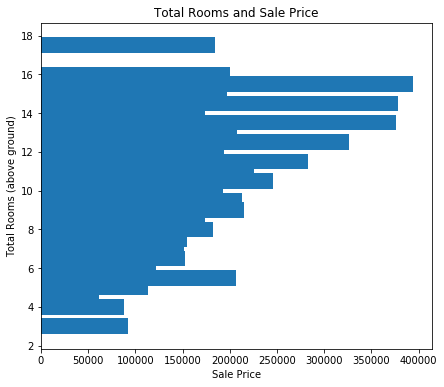

In [17]:
# Plot with rooms available 
train["TotRms AbvGrd STR"] = train["TotRms AbvGrd"].astype('str')

averages, categories = avg_categories(train, "TotRms AbvGrd STR")

categories = categories.astype('float')

plt.figure(figsize = (7, 6))

plt.barh(categories, averages)
plt.title("Total Rooms and Sale Price")
plt.ylabel("Total Rooms (above ground)")
plt.xlabel("Sale Price"); 

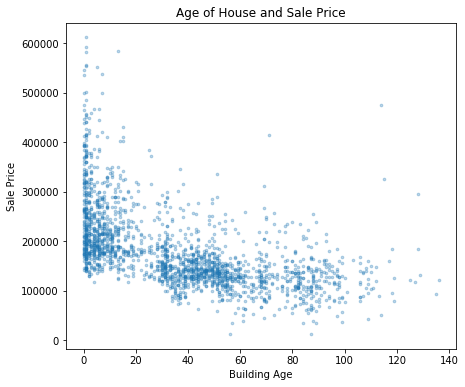

In [18]:
# Plot with house age at sale
plt.figure(figsize = (7, 6))

plt.scatter(train["Age Sold"], train["SalePrice"], s = 7, alpha = 0.3)
plt.title("Age of House and Sale Price")
plt.xlabel("Building Age")
plt.ylabel("Sale Price"); 

Text(0, 0.5, 'Sale Price')

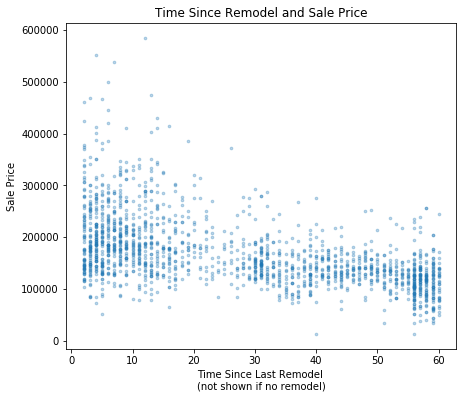

In [19]:
# Plot with time since last remodel 
plt.figure(figsize = (7, 6))

remodel = train[train["Remodel Age"] > 1]

plt.scatter(remodel["Remodel Age"], remodel["SalePrice"], s = 7, alpha = 0.3)
plt.title("Time Since Remodel and Sale Price")
plt.xlabel("Time Since Last Remodel \n(not shown if no remodel)")
plt.ylabel("Sale Price")

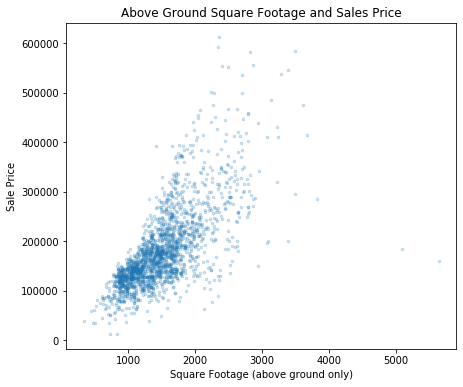

In [20]:
# Plot with square footage (above ground)
plt.figure(figsize = (7, 6))

plt.scatter(train["Gr Liv Area"], train["SalePrice"], s = 7, alpha = 0.2)
plt.title("Above Ground Square Footage and Sales Price")
plt.xlabel("Square Footage (above ground only)")
plt.ylabel("Sale Price"); 

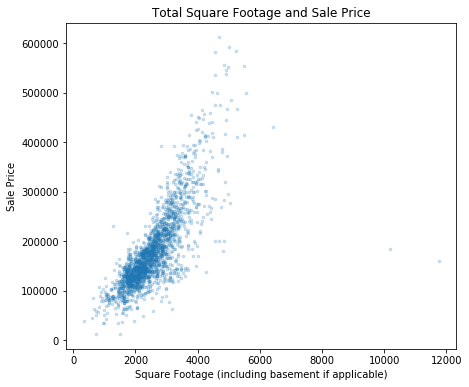

In [21]:
# Plot with total square footage (including basement)
plt.figure(figsize = (7, 6))

plt.scatter((train["Gr Liv Area"] + train["Total Bsmt SF"]), train["SalePrice"], s = 7, alpha = 0.2)
plt.title("Total Square Footage and Sale Price")
plt.xlabel("Square Footage (including basement if applicable)")
plt.ylabel("Sale Price"); 

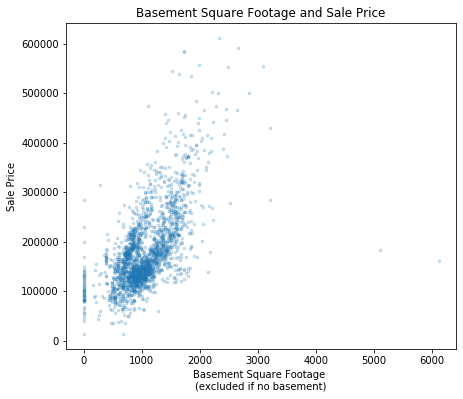

In [22]:
# Plot with basement square footage only
plt.figure(figsize = (7, 6))

plt.scatter(train["Total Bsmt SF"], train["SalePrice"], s = 7, alpha = 0.2)
plt.title("Basement Square Footage and Sale Price")
plt.xlabel("Basement Square Footage \n(excluded if no basement)")
plt.ylabel("Sale Price"); 

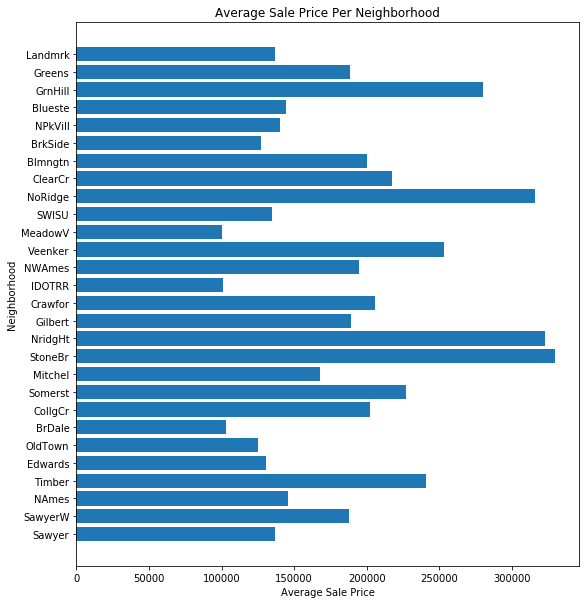

In [23]:
# Plot neighborhood
plt.figure(figsize = (9, 10))

averages, categories = avg_categories(train, "Neighborhood")

plt.barh(categories, averages)
plt.title("Average Sale Price Per Neighborhood")
plt.xlabel("Average Sale Price")
plt.ylabel("Neighborhood"); 

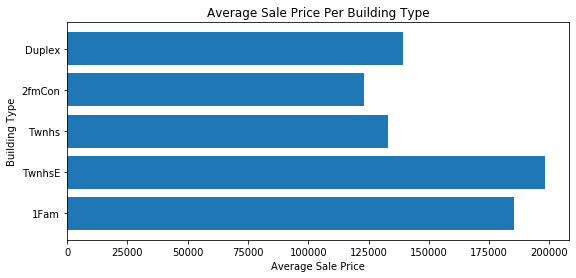

In [24]:
# plot building type 

plt.figure(figsize = (9, 4))

averages, categories = avg_categories(train, "Bldg Type")

plt.barh(categories, averages)
plt.title("Average Sale Price Per Building Type")
plt.xlabel("Average Sale Price")
plt.ylabel("Building Type"); 

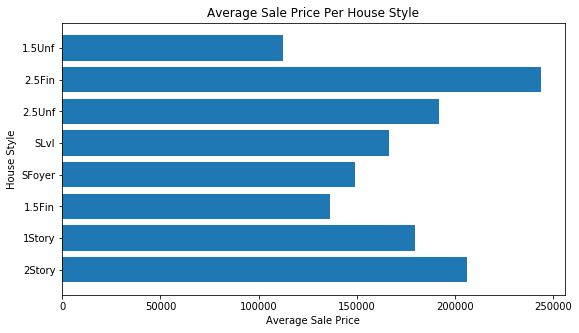

In [25]:
# plot house style 

averages, categories = avg_categories(train, "House Style")

plt.figure(figsize = (9, 5))

plt.barh(categories, averages)
plt.title("Average Sale Price Per House Style")
plt.xlabel("Average Sale Price")
plt.ylabel("House Style"); 

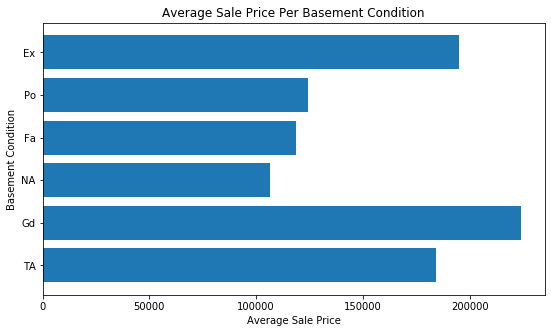

In [26]:
# plot basement condition 

averages, categories = avg_categories(train, "Bsmt Cond")

plt.figure(figsize = (9, 5))

plt.barh(categories, averages)
plt.title("Average Sale Price Per Basement Condition")
plt.xlabel("Average Sale Price")
plt.ylabel("Basement Condition"); 

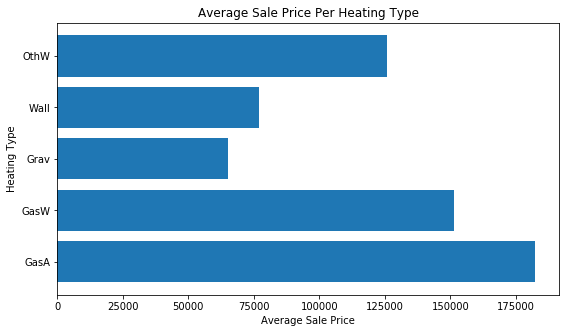

In [27]:
averages, categories = avg_categories(train, "Heating")

plt.figure(figsize = (9, 5))

plt.barh(categories, averages)
plt.title("Average Sale Price Per Heating Type")
plt.xlabel("Average Sale Price")
plt.ylabel("Heating Type"); 

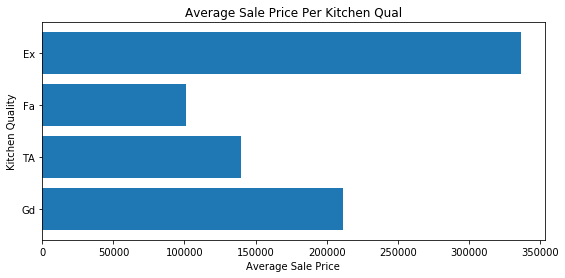

In [28]:
averages, categories = avg_categories(train, "Kitchen Qual")

plt.figure(figsize = (9, 4))

plt.barh(categories, averages)
plt.title("Average Sale Price Per Kitchen Qual")
plt.xlabel("Average Sale Price")
plt.ylabel("Kitchen Quality"); 

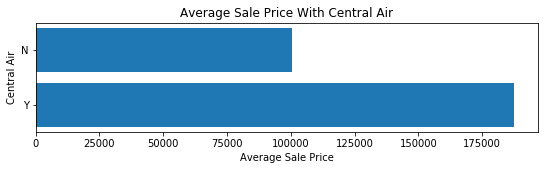

In [29]:
averages, categories = avg_categories(train, "Central Air")

plt.figure(figsize = (9, 2))

plt.barh(categories, averages)
plt.title("Average Sale Price With Central Air")
plt.xlabel("Average Sale Price")
plt.ylabel("Central Air"); 

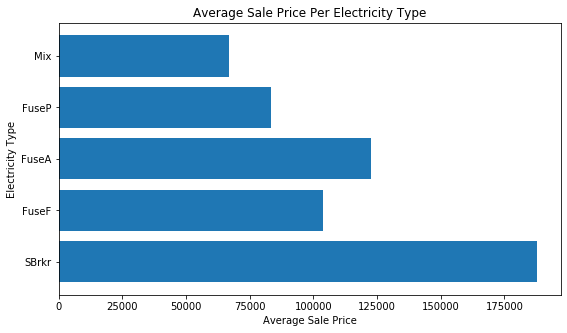

In [30]:
averages, categories = avg_categories(train, "Electrical")

plt.figure(figsize = (9, 5))

plt.barh(categories, averages)
plt.title("Average Sale Price Per Electricity Type")
plt.xlabel("Average Sale Price")
plt.ylabel("Electricity Type"); 

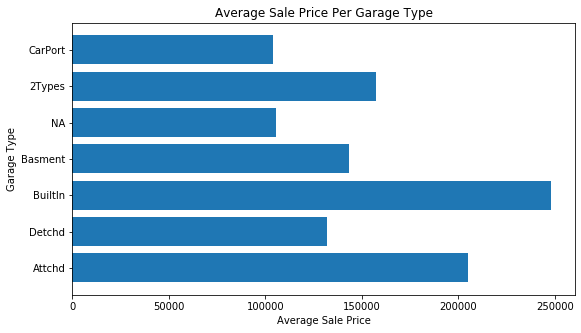

In [31]:
averages, categories = avg_categories(train, "Garage Type")

plt.figure(figsize = (9, 5))

plt.barh(categories, averages)
plt.title("Average Sale Price Per Garage Type")
plt.xlabel("Average Sale Price")
plt.ylabel("Garage Type"); 

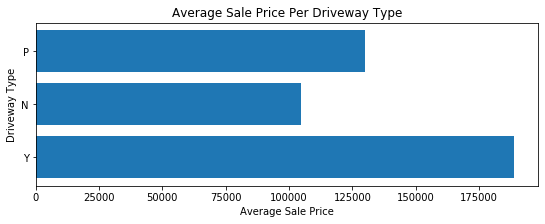

In [32]:
averages, categories = avg_categories(train, "Paved Drive")

plt.figure(figsize = (9, 3))

plt.barh(categories, averages)
plt.title("Average Sale Price Per Driveway Type")
plt.xlabel("Average Sale Price")
plt.ylabel("Driveway Type"); 

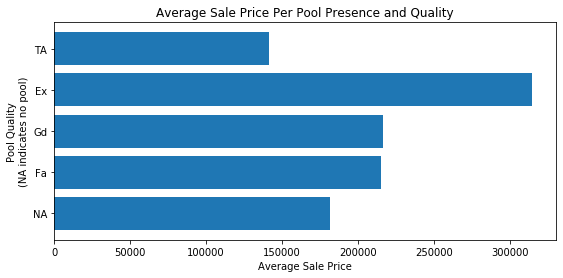

In [33]:
averages, categories = avg_categories(train, "Pool QC")

plt.figure(figsize = (9, 4))

plt.barh(categories, averages)
plt.title("Average Sale Price Per Pool Presence and Quality")
plt.xlabel("Average Sale Price")
plt.ylabel("Pool Quality\n(NA indicates no pool)"); 

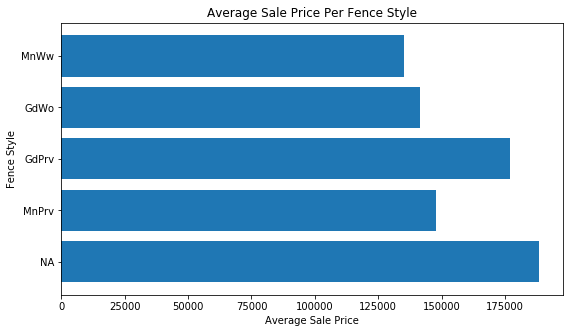

In [34]:
# Fence style 
averages, categories = avg_categories(train, "Fence")

plt.figure(figsize = (9, 5))

plt.barh(categories, averages)
plt.title("Average Sale Price Per Fence Style")
plt.xlabel("Average Sale Price")
plt.ylabel("Fence Style"); 

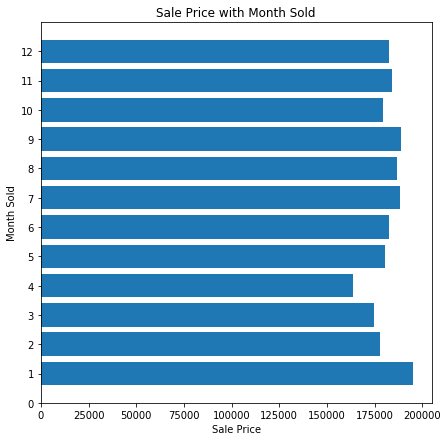

In [35]:
# plot with month sold
train["Mo Sold"] = train["Mo Sold"].astype("str")

averages, categories = avg_categories(train, "Mo Sold")

categories = categories.astype("int")

plt.figure(figsize = (7, 7))

plt.barh(categories, averages)
plt.title("Sale Price with Month Sold")
plt.xlabel("Sale Price")
plt.ylabel("Month Sold")
plt.yticks(range(13)); 

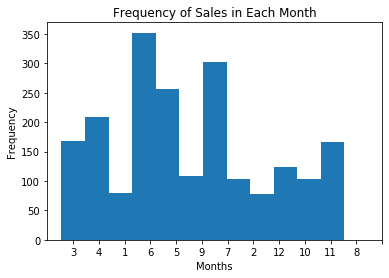

In [36]:
# frequencies of sales per month 

plt.hist(train["Mo Sold"], align = "left", bins = 12)
plt.title("Frequency of Sales in Each Month")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.xticks(range(13)); 

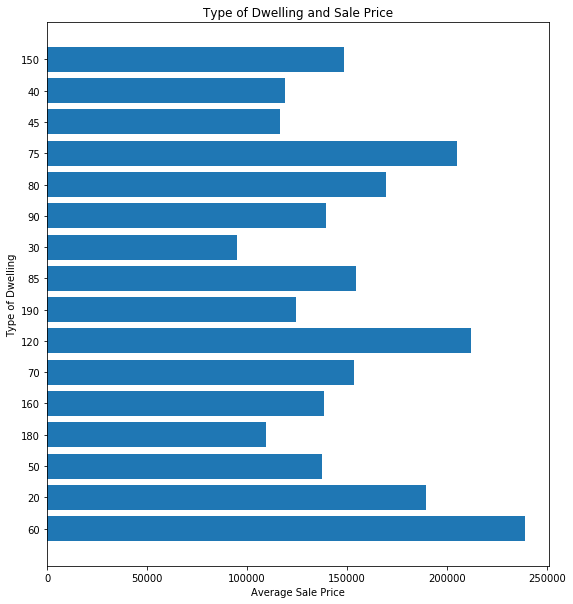

In [37]:
# MS SubClass 
# recasting MS SubClass as string, function will only work a string as category values
# these numbers do not have numerical significance in any case 
train["MS SubClass"] = train["MS SubClass"].astype('str')

averages, categories = avg_categories(train, "MS SubClass")

plt.figure(figsize = (9, 10))

plt.barh(categories, averages)
plt.title("Type of Dwelling and Sale Price")
plt.xlabel("Average Sale Price")
plt.ylabel("Type of Dwelling"); 

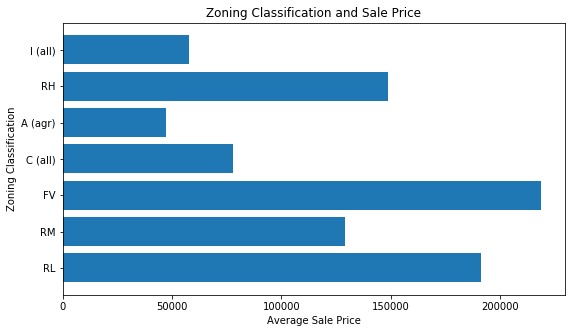

In [38]:
# plot MS Zoning

averages, categories = avg_categories(train, "MS Zoning")

plt.figure(figsize = (9, 5))

plt.barh(categories, averages)
plt.title("Zoning Classification and Sale Price")
plt.xlabel("Average Sale Price")
plt.ylabel("Zoning Classification"); 

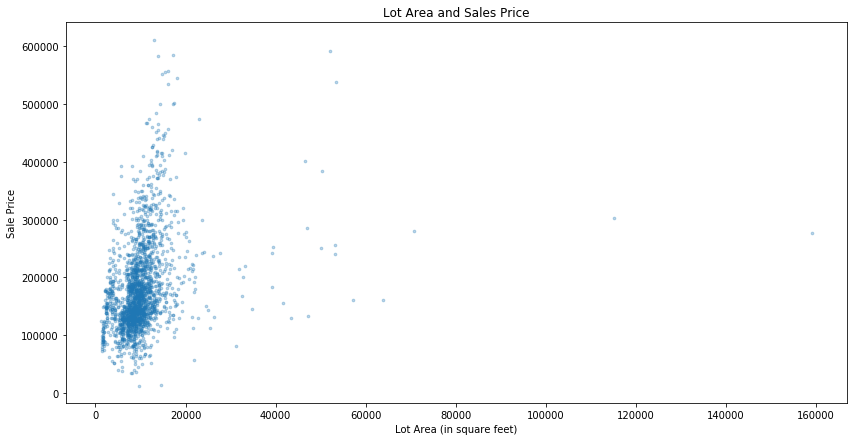

In [39]:
# plot lot area 
plt.figure(figsize = (14,  7))

plt.scatter(train["Lot Area"], 
            train["SalePrice"], s = 7, alpha = 0.3)
plt.title("Lot Area and Sales Price")
plt.xlabel("Lot Area (in square feet)")
plt.ylabel("Sale Price"); 

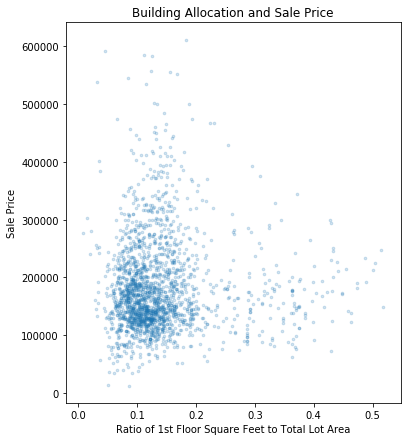

In [40]:
# plot ratio of first floor square feet to lot area

plt.figure(figsize = (6, 7))

plt.scatter((train["1st Flr SF"]/train["Lot Area"]), train["SalePrice"], s = 7, alpha = 0.2)
plt.title("Building Allocation and Sale Price")
plt.xlabel("Ratio of 1st Floor Square Feet to Total Lot Area")
plt.ylabel("Sale Price"); 

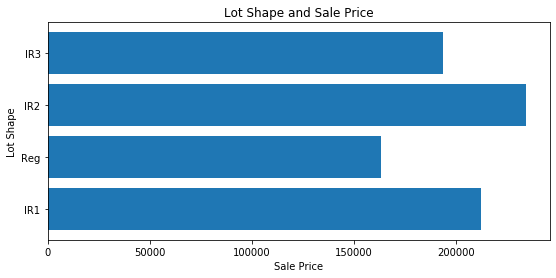

In [41]:
# lot shape 
averages, categories = avg_categories(train, "Lot Shape")

plt.figure(figsize = (9, 4))

plt.barh(categories, averages)
plt.title("Lot Shape and Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Lot Shape"); 

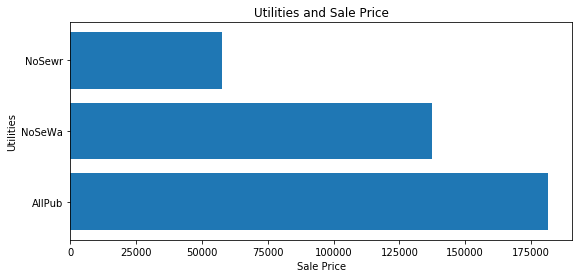

In [42]:
# utility type

averages, categories = avg_categories(train, "Utilities")

plt.figure(figsize = (9, 4))

plt.barh(categories, averages)
plt.title("Utilities and Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Utilities"); 

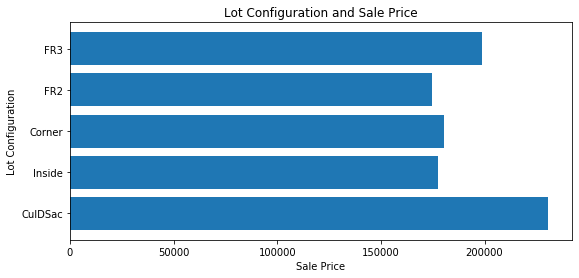

In [43]:
# Lot configuration (surroundings)

averages, categories = avg_categories(train, "Lot Config")

plt.figure(figsize = (9, 4))

plt.barh(categories, averages)
plt.title("Lot Configuration and Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Lot Configuration"); 

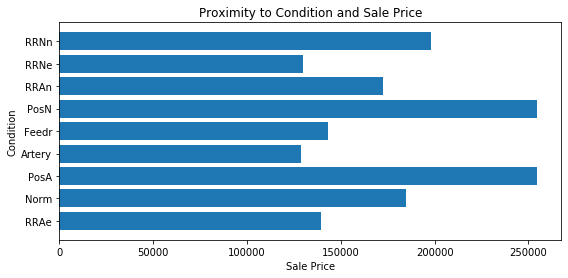

In [44]:
# Condition 1: proximity to various conditions 

averages, categories = avg_categories(train, "Condition 1")

plt.figure(figsize = (9, 4))

plt.barh(categories, averages)
plt.title("Proximity to Condition and Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Condition"); 

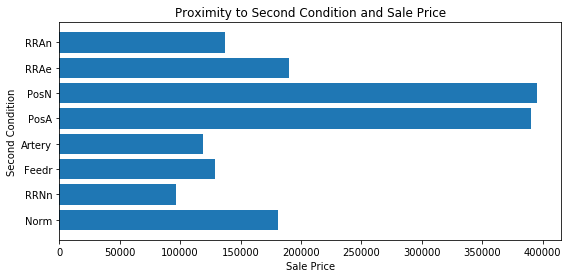

In [45]:
# Condition 2 

averages, categories = avg_categories(train, "Condition 2")

plt.figure(figsize = (9, 4))

plt.barh(categories, averages)
plt.title("Proximity to Second Condition and Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Second Condition"); 

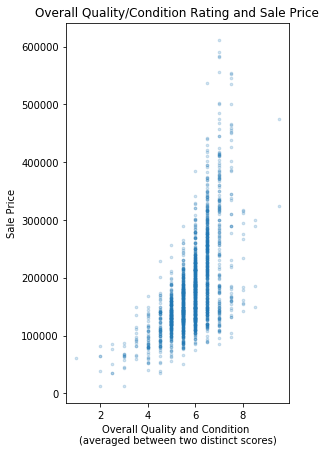

In [46]:
# average between overall quality and condition 
plt.figure(figsize = (4, 7))

plt.scatter(train["Overall Qu Co Avg"], train["SalePrice"], s = 7, alpha = 0.2)
plt.title("Overall Quality/Condition Rating and Sale Price")
plt.xlabel("Overall Quality and Condition \n(averaged between two distinct scores)")
plt.ylabel("Sale Price"); 

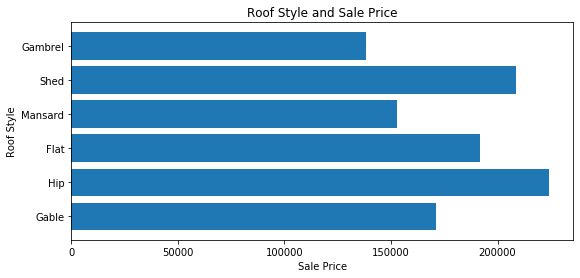

In [47]:
# roof style 

averages, categories = avg_categories(train, "Roof Style")

plt.figure(figsize = (9, 4))

plt.barh(categories, averages)
plt.title("Roof Style and Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Roof Style"); 

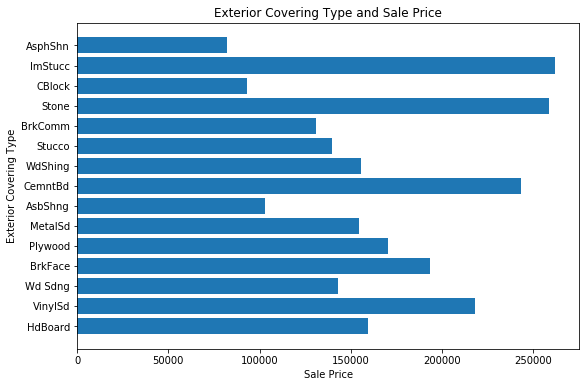

In [48]:
# Exterior covering 1 

averages, categories = avg_categories(train, "Exterior 1st")

plt.figure(figsize = (9, 6))

plt.barh(categories, averages)
plt.title("Exterior Covering Type and Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Exterior Covering Type"); 

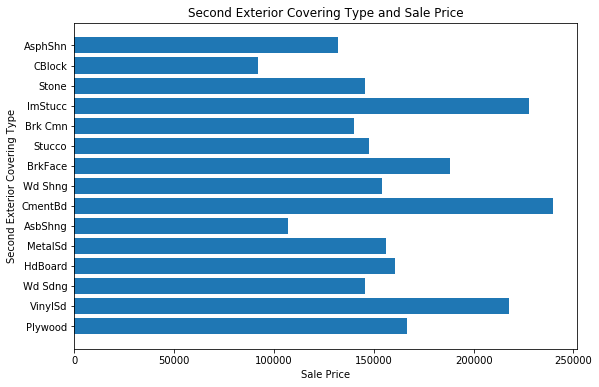

In [49]:
# Exterior covering 2

averages, categories = avg_categories(train, "Exterior 2nd")

plt.figure(figsize = (9, 6))

plt.barh(categories, averages)
plt.title("Second Exterior Covering Type and Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Second Exterior Covering Type"); 

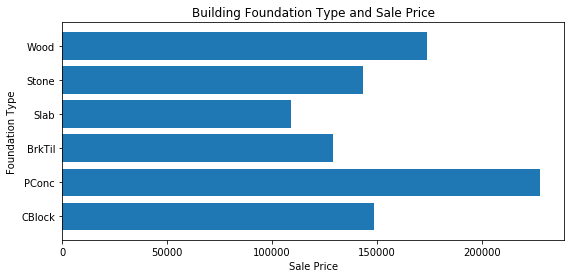

In [50]:
# type of foundation 

averages, categories = avg_categories(train, "Foundation")

plt.figure(figsize = (9, 4))

plt.barh(categories, averages)
plt.title("Building Foundation Type and Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Foundation Type"); 

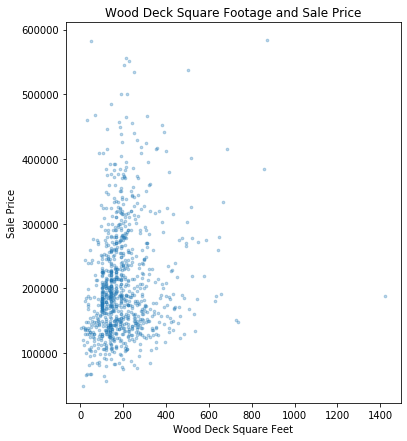

In [51]:
# Wood deck 
plt.figure(figsize = (6, 7))

plt.scatter(train.loc[train["Wood Deck SF"] > 0, "Wood Deck SF"], 
            train.loc[train["Wood Deck SF"] > 0, "SalePrice"], s = 7, alpha = 0.3)
plt.title("Wood Deck Square Footage and Sale Price")
plt.xlabel("Wood Deck Square Feet")
plt.ylabel("Sale Price"); 

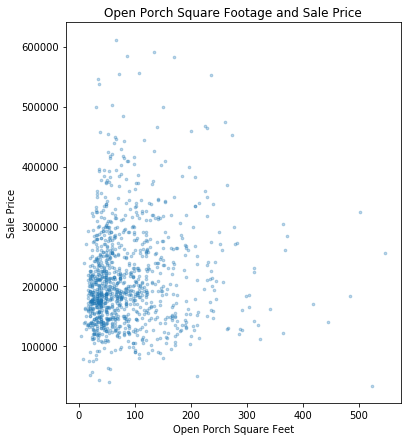

In [52]:
# Open Porch

plt.figure(figsize = (6, 7))

plt.scatter(train.loc[train["Open Porch SF"] > 0, "Open Porch SF"], 
            train.loc[train["Open Porch SF"] > 0, "SalePrice"], s = 7, alpha = 0.3)
plt.title("Open Porch Square Footage and Sale Price")
plt.xlabel("Open Porch Square Feet")
plt.ylabel("Sale Price");

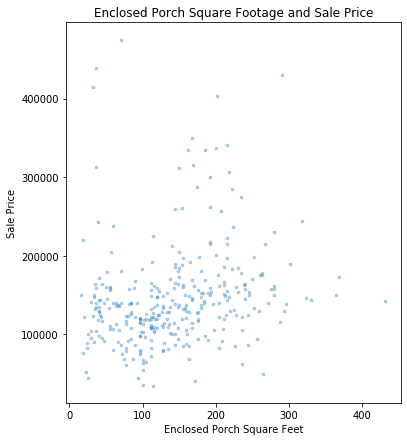

In [53]:
# Enclosed Porch 
plt.figure(figsize = (6, 7))

plt.scatter(train.loc[train["Enclosed Porch"] > 0, "Enclosed Porch"], 
            train.loc[train["Enclosed Porch"] > 0, "SalePrice"], s = 7, alpha = 0.3)
plt.title("Enclosed Porch Square Footage and Sale Price")
plt.xlabel("Enclosed Porch Square Feet")
plt.ylabel("Sale Price");

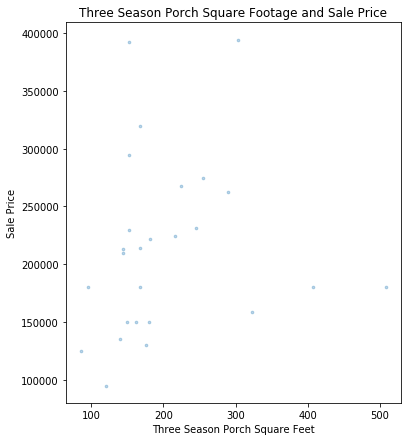

In [54]:
# 3 Season Porch 
plt.figure(figsize = (6, 7))

plt.scatter(train.loc[train["3Ssn Porch"] > 0, "3Ssn Porch"], 
            train.loc[train["3Ssn Porch"] > 0, "SalePrice"], s = 7, alpha = 0.3)
plt.title("Three Season Porch Square Footage and Sale Price")
plt.xlabel("Three Season Porch Square Feet")
plt.ylabel("Sale Price");

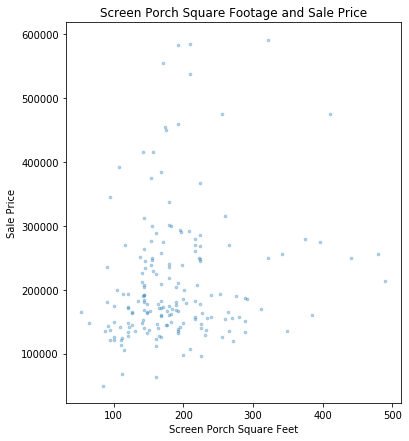

In [55]:
# screen porch 
plt.figure(figsize = (6, 7))

plt.scatter(train.loc[train["Screen Porch"] > 0, "Screen Porch"], 
            train.loc[train["Screen Porch"] > 0, "SalePrice"], s = 7, alpha = 0.3)
plt.title("Screen Porch Square Footage and Sale Price")
plt.xlabel("Screen Porch Square Feet")
plt.ylabel("Sale Price");

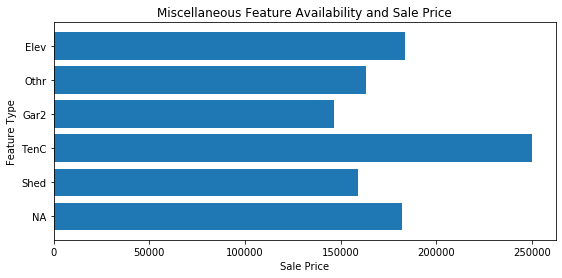

In [56]:
# Misc Feature
averages, categories = avg_categories(train, "Misc Feature")

plt.figure(figsize = (9, 4))

plt.barh(categories, averages)
plt.title("Miscellaneous Feature Availability and Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Feature Type"); 

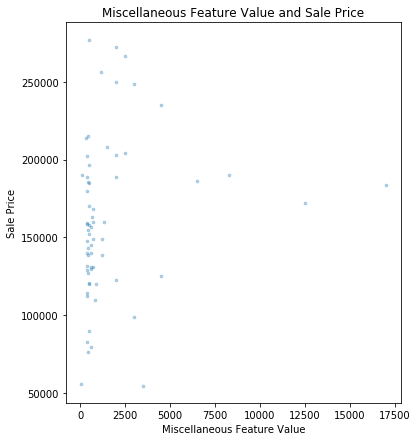

In [57]:
# Misc feature value 
# displaying any value above zero since zero-values overwhelmed other values in original graph 
plt.figure(figsize = (6, 7))

plt.scatter(train.loc[train["Misc Val"] > 0, "Misc Val"], 
            train.loc[train["Misc Val"] > 0, "SalePrice"], s = 7, alpha = 0.3)
plt.title("Miscellaneous Feature Value and Sale Price")
plt.xlabel("Miscellaneous Feature Value")
plt.ylabel("Sale Price");

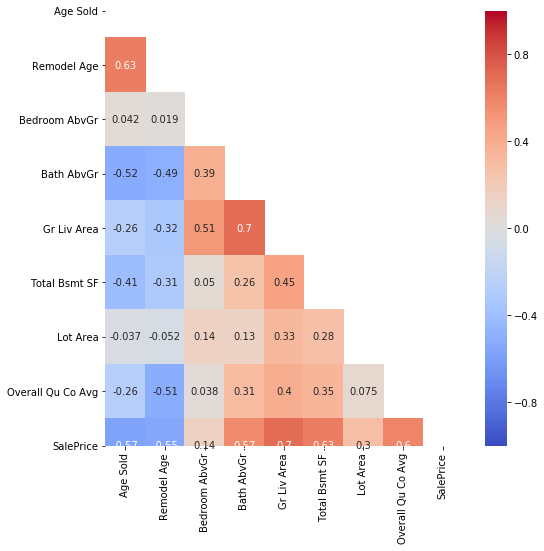

In [58]:
# heatmap to visualize relationships between some numerical variables and sale price 

variables = train.loc[:, ["Age Sold", "Remodel Age", "Bedroom AbvGr", "Bath AbvGr", "Gr Liv Area", "Total Bsmt SF", 
                          "Lot Area", "Overall Qu Co Avg", "SalePrice"]]

mask = np.triu(variables.corr())

plt.figure(figsize = (8, 8))

sns.heatmap(variables.corr(), mask = mask, cmap = "coolwarm", annot = True, vmin = -1, vmax = 1);

## Observations and Initial Predictive Variable Selection 

Here are observations of relationships between traits of buildings and their final sale price. These observations are based off of the visuals generated above, there are notes on the intent to include these traits as variables in a model built to predict sale price of a home given certain traits. 

#### Numerical and Continuous Variables 
 - House Age at Sale 
   - This variable measures how old the building was at the time it was sold 
   - There appears to be a slight negative correlation between home age and sale price, and once the age gets beyond 10 years the relationship appears to be loosely linear 
   - Include in model: Y
 - Remodel Age at Sale
   - This variable measures how long it had been since the last remodeling at the time of sale. If there was no remodel, the remodel age is the same as the home age
   - The relationship here appears to be very similar to that between house age and sale price, though slightly more linear 
   - Include in model: Y 
 - Above Ground Living Area 
   - This variable measures how much total square footage there is above ground (excludes any basement square footage from this measurement), including both the first and second floor (if applicable)
   - The relationship appears to be positive, though not exactly linear 
   - Include in model: Y
 - Total Square Footage Available
   - This variable measures how much total square footage is included with the building, including the basement
   - The relationship appears strongly positive, and could pass as linear 
   - Include in model: Y 
 - Basement Square Footage
   - This variable measures the square footage of the basement (zero if no basement exists) 
   - The relationship appears to be positive
   - Include in model: Y
 - Lot Area
   - This variable measures the total area of the lot the building is situated on (in square feet) 
   - This trait has a positive relationship with sale price. If outliers (particularly points of over 10,000 sq ft) are disregarded, the relationship appears to be loosely linear 
   - Include in model: Y 
 - Home Coverage
   - This trait is the ratio of first floor square footage to total lot area, meant to describe how much of the lot is taken up by the home 
   - There is a large clump with a wide range of sale prices with lower ratios (< 0.25), with fewer homes and lower sale prices being associated with higher ratios (up to 0.5)
   - Include in model: N 
     - The relationship does not appear to have direction or linearity
     - If it is determined that the model will need additional traits to improve accuracy, this trait will be on the short list 
 - Overall Quality/Condition 
   - This trait is an average between the Overall Condition score and the Overall Condition score 
   - There appears to be a strongly positive correlation with sale price, and the relationship is more exponential in shape rather than linear 
   - Include in model: Y 
 - Wood Deck, Open Porch, Enclosed Porch, 3 Season Porch, Screen Porch 
   - These traits are the square footage for each of the types of porch 
   - None of the traits appear to have a strong relationship with sale price as they lack pattern, aggregation, and direction
   - Include in model: N 

#### Categorical and Discrete Variables 
 - Number of Rooms 
   - This variable is based off of the total number of rooms in the building, excluding those that were in basements
   - The number of rooms in the building appears to have an impact on the average sale price
   - Include in model: Y
 - Neighborhood
   - This trait describes the neighborhood the building is located in. The figure does not display neighborhoods by any particular grouping
   - Given that the mean sale price can vary widely between neighborhoods (lowest mean appears around $\$$100,000 and the highest is around $\$$300,000) there is a strong possibility of a significant relationship between neighborhood and final sale price
   - Include in model: Y
 - Building Type 
   - This trait describes the type of dwelling the building is (ex: single family, duplex, townhouse end unit, etc)
   - The mean sale price between categories in this case are not spread over a wide range (the lowest mean is around $\$$135,000 while the highest is $\$$200,00), so it is difficult to assert that there is a significant relationship between building type and final sale price 
   - Include in model: N 
 - House Style
   - This trait describes the style of house (ex: one story, two story, one and 1/2 story, etc)
   - The range in mean sale price of each category is around $\$$150,000, indicating that there could be a signficant relationship between house style and sale price 
   - Include in model: Y
 - Basement Condition 
   - This trait describes the condition of a basement in the house (NA for no basement present) 
   - The range in mean sale price of each category is over $\$$100,000, indicating that there could be a significant relationship between basement condition/presence and sale price 
   - Include in model: Y
 - Heating Type 
   - This trait describes the type of heating in the home (ex: floor furnace, wall furnace, gas hot water/steam heat, etc)
   - The range in mean sale price of each category is over $\$$100,000, indicating that there could be a significant relationship between heating type and sale price 
   - There are lower averages in this set of categories as opposed to others (such as neighborhood and house style), indicating that the categories for this trait have a greater diversity of sale prices
   - Include in model: Y
 - Central Air
   - This trait specifies whether the house has central air conditioning or not 
   - The rnag ein mean sale price for this trait is around $\$$75,000, which while not negligible it is not as significant as some of the other traits 
   - Include in model: N 
     - If it is decided that more variables need to be added to the model, this trait will be on the short list 
 - Electricity Type 
   - This trait desribes the kind of electrical system the home has (standard circuit breakers, fuse box and romex wiring, mixed type, etc)
   - The range in mean sale price for categories here is around $\$$100,000, indicating that ere could be a significant relationship between electrical system and sale price 
   - Include in model: Y
 - Garage Type 
   - This trait describes the garage location relative to the home (built in, attached, basement garage, etc)
   - The range in mean sale price for categories of this trait is more than $\$$150,000, indicating there could be a significant relationship to sale price 
   - Include in model: Y
 - Paved Drive 
   - This trait describes the pavement of the driveway (paved, partial, or not paved)
   - The range in mean sale price for this trait is around $\$$75,000, which is not negligible but not striking compared to other traits 
   - Include in model: N 
 - Pool Quality 
   - This trait describes the presence/quality of a pool
   - The range in mean sale price for this trait is over $\$$150,000, indicating a signficant relationship with sale price 
   - Include in model: Y
 - Fence Style
   - This trait describes the quality of fence surrounding the home, assessing the privacy it creates for the residents
   - The range in mean sale price for this trait is around $\$$75,000, which is not negligible but not striking compared to other traits
   - Include in model: N 
 - Month Sold
   - This trait specifies which month the sale of the home was finalized
   - The range in mean sale price for this trait is under $\$$50,000, which is not salient when compared to other categories 
   - Include in model: N 
   - What is striking is the number of sales per month 
     - The summer months have noticeably higher sales frequencies than those of the winter months
 - MS SubClass 
   - This trait describes the type of dwelling, and is more descriptive than the building type category in that there are more options with some accountability for house age being factored in 
   - The range for mean sale price in this trait appears to be over $\$$150,000, indicating a significant relationship with sale price 
   - Include in model: Y 
 - MS Zoning
   - This trait describes the general zoning classification of the sale (ex: agriculture, comercial, residential high density, residential low density, etc) 
   - The range of mean sale price for this category appears to be over $\$$150,000, indicating a significant relationship with sale price 
   - Include in model: Y 
 - Lot Shape 
   - This trait describes the shape of the lot the home is situated on (regular, slightly irregular, moderately irregular, irregular)
   - The range of mean sale price for this category appears to be around $\$$75,000, which is not negligible but not significant enough compared to other traits 
   - Include in model: N 
 - Utility Type 
   - This trait describes the type of utilities available with the home (all public, electricity and gas only, etc)
   - The range of mean sale price for this category is over $\$$125,000, indicating a significant relationship with sales price 
   - Include in model: Y 
 - Lot Configuration 
   - This trait describes the configuration of the lot, specifically relating to the exposure to streets 
   - The range of mean sale price for this category is less than $\$$50,000, which is not striking when compared to other categories
   - Include in model: N 
 - Proximity to Conditions
   - Both proximity to condition traits describe the proximity the lot has to certain features (near an arterial street, near a park/greenbelt, etc)
   - Both categories' ranges for mean sale price are over $\$$100,000, indicating a significant relationship with sales price 
   - Include in model (both): Y 
 - Roof Style 
   - This trait describe the style of roof on the home (ex: flat, gable, shed, etc) 
   - The range in mean sale price for this category appears to be around $\$$75,000, which is not negligible but not striking enough compared to other traits 
   - Include in model: N 
 - Exterior Covering (both 1 and 2) 
   - This trait describes the type of exterior covering there is on the home (there is a second category in case there are multiple types) 
   - The ranges in sale price for both of the categories appear to be around or above $\$$150,000, indicating a significant relationship with sale price
   - Include in model: Y 
 - Building Foundation Type 
   - This trait describes the type of foundation the home has 
   - The range in sale price for this category appears to be over $\$$100,000, indicating a significant relationship with sale price
   - Include in model: Y 
 - Miscellaneous Feature 
   - This trait describes the type of feature available not covered by the other categories, if applicable 
   - The range in mean sale price for this category appears to be around $\$$100,000, indicating a significant relationship with sale price 
   - Include in model: Y 
 - Kitchen Quality 
   - This trait describes the quality of the home's kitchen(s)
   - The range in mean sale price for this category appears to be around $\$$150,000, indicating a significant relationship with sale price 
   - Include in model: Y 
   
#### Outliers
In a few of the scatter plots, certain outliers revealed themselves to be far removed from the general pattern/grouping of the data. In particular, these points were: 
  - Homes whose miscellaneous feature was worth more than 10,000
  - Homes whose above ground square footage was more than 5000
  - Homes whose basement square footage was more than 4500
  - Homes whose lot area was more than more than 14000

### Variables to include in model
**Categorical/Discrete:** Number of Rooms, Neighborhood, House Style, Basement Condition, Heating Type, Electricity Type, Garage Type, Pool Quality, MS SubClass, MS Zoning, Utility Type, Proximity to Conditions (1 and 2), Exterior Covering (1 and 2), Building Foundation Type, Miscellaneous Feature, Kitchen Quality

**Numerical/Continuous:** House Age, Remodel Age, Above Ground Living Area, Total Square Footage Available, Lot Area, Overall Quality/Condition Average

**Total Number of Variables (excluding trait dummying):** 24